In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')

df = pd.read_csv('heart_2020_cleaned.csv')
df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


In [16]:
df['HeartDisease'].value_counts(normalize=True)

HeartDisease
No     0.914405
Yes    0.085595
Name: proportion, dtype: float64

In [17]:
df['HeartDisease'] = df['HeartDisease'].apply(lambda x: 0 if x == 'No' else 1)

In [18]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111, stratify=y)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((223856, 17), (95939, 17), (223856,), (95939,))

In [20]:
cat_col = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

In [21]:
from sklearn.preprocessing import LabelEncoder
for i in cat_col:
	ll = LabelEncoder()
	X_train[i] = ll.fit_transform(X_train[i])
	X_test[i] = ll.transform(X_test[i])

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223856 entries, 265704 to 12026
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               223856 non-null  float64
 1   Smoking           223856 non-null  int32  
 2   AlcoholDrinking   223856 non-null  int32  
 3   Stroke            223856 non-null  int32  
 4   PhysicalHealth    223856 non-null  float64
 5   MentalHealth      223856 non-null  float64
 6   DiffWalking       223856 non-null  int32  
 7   Sex               223856 non-null  int32  
 8   AgeCategory       223856 non-null  int32  
 9   Race              223856 non-null  int32  
 10  Diabetic          223856 non-null  int32  
 11  PhysicalActivity  223856 non-null  int32  
 12  GenHealth         223856 non-null  int32  
 13  SleepTime         223856 non-null  float64
 14  Asthma            223856 non-null  int32  
 15  KidneyDisease     223856 non-null  int32  
 16  SkinCancer        223

In [25]:
smote = SMOTE(random_state=123)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [37]:
X_train_sm.values

array([[34.27      ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [21.95      ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [29.29      ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [25.60793279,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [31.86707089,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [23.63318484,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [36]:
y_train_sm.values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [39]:
model = RandomForestClassifier(n_estimators=10,random_state=123)
model.fit(X_train_sm.values,y_train_sm.values)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score , f1_score
print('모델 정확도 {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

모델 정확도 0.8542


In [45]:
feature_score= pd.Series(model.feature_importances_, index= X_train.columns).sort_values(ascending=False)
feature_score

BMI                 0.256294
AgeCategory         0.188186
SleepTime           0.133655
GenHealth           0.096455
PhysicalHealth      0.078846
MentalHealth        0.054864
PhysicalActivity    0.037899
Race                0.028260
Diabetic            0.023131
Smoking             0.019598
Sex                 0.018777
AlcoholDrinking     0.016028
Asthma              0.012997
DiffWalking         0.010793
SkinCancer          0.010284
Stroke              0.007667
KidneyDisease       0.006268
dtype: float64

<Axes: xlabel='None', ylabel='None'>

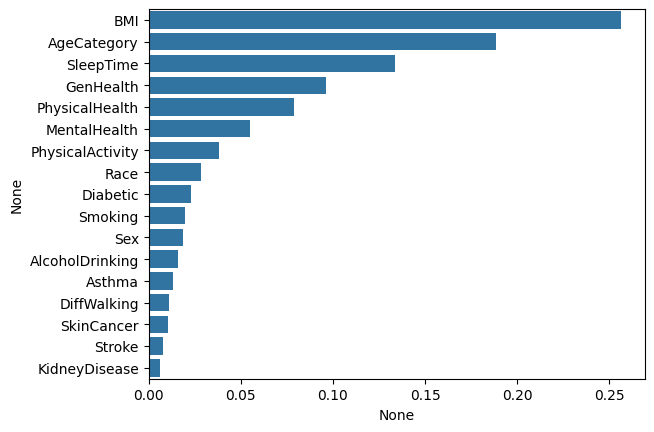

In [46]:
sns.barplot(x = feature_score, y=feature_score.index)

In [48]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[6,8],
    'min_samples_leaf':[1,5],
    'n_estimators':[100]
}

rf = RandomForestClassifier(random_state=123) # n_estimators=300 은 따로 넣지 않았지만 직접 넣어서도 수행해 보세요!
grid_cv = GridSearchCV(rf, param_grid = params, cv =3) #꼭 3을 할 필욘 없고 5, 10 다 가능
grid_cv.fit(X_train_sm.values, y_train_sm.values)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [6, 8], 'min_samples_leaf': [1, 5],
                         'n_estimators': [100]})

In [49]:
print(grid_cv.best_params_)
print('{0:.4f}'.format(grid_cv.best_score_))

{'max_depth': 8, 'min_samples_leaf': 1, 'n_estimators': 100}
0.7717
